# ML Classification Algorithm for Hate Speech Detection

*Creating a Basic Classification Algorithm that can be trained on a dataset of tweets labeled as hate speech, offensive, or neither, and can predict the class of a new tweet.*

### Reading Dataset from file

In [1]:
import pandas as pd

labeled_hate_speech= pd.read_csv("labeled_data.csv")

### Exploratory Data Analysis

In [2]:
#Columns of Dataset
labeled_hate_speech.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [3]:
# Obtaining summary of dataset
print(labeled_hate_speech.describe())

         Unnamed: 0         count   hate_speech  offensive_language  \
count  24783.000000  24783.000000  24783.000000        24783.000000   
mean   12681.192027      3.243473      0.280515            2.413711   
std     7299.553863      0.883060      0.631851            1.399459   
min        0.000000      3.000000      0.000000            0.000000   
25%     6372.500000      3.000000      0.000000            2.000000   
50%    12703.000000      3.000000      0.000000            3.000000   
75%    18995.500000      3.000000      0.000000            3.000000   
max    25296.000000      9.000000      7.000000            9.000000   

            neither         class  
count  24783.000000  24783.000000  
mean       0.549247      1.110277  
std        1.113299      0.462089  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      1.000000  
75%        0.000000      1.000000  
max        9.000000      2.000000  


In [4]:
# Checking values of each column
labeled_hate_speech.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
#Only the last two columns, class & tweet, are required for classification

labeled_hate_speech[['class','tweet']]

labeled_hate_speech.drop(['hate_speech','count','offensive_language','neither'],axis=1,inplace=True)

print(labeled_hate_speech)

       Unnamed: 0  class                                              tweet
0               0      2  !!! RT @mayasolovely: As a woman you shouldn't...
1               1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2               2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3               3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4               4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...           ...    ...                                                ...
24778       25291      1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779       25292      2  you've gone and broke the wrong heart baby, an...
24780       25294      1  young buck wanna eat!!.. dat nigguh like I ain...
24781       25295      1              youu got wild bitches tellin you lies
24782       25296      2  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[24783 rows x 3 columns]


#### Analysing Dataset for Classification

[2 1 0]


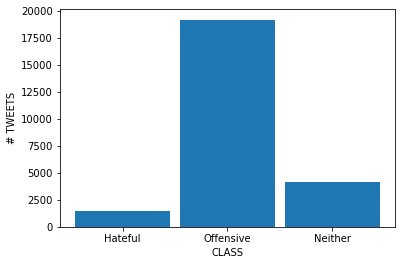

In [6]:
#Analysing the Distribution of the Dataset

print(labeled_hate_speech['class'].unique())

from matplotlib import pyplot as plt

fig,ax=plt.subplots(1,1)
ax.hist(labeled_hate_speech['class'],bins=[0,1,2,3],rwidth=0.9)
ax.set_xlabel('CLASS')
ax.set_xticks((0.5,1.5,2.5))
ax.set_xticklabels(('Hateful','Offensive','Neither'))
ax.set_ylabel('# TWEETS')

plt.savefig('histogram.jpg')

### Data Pre-Processing

#### Cleaning the Tweets using Spacy

In [50]:
import spacy
#Loading English pipeline
nlp = spacy.load("en_core_web_sm")

#Function to remove stopwords, punctuation and blank spaces and convert all text to lowercase 
def text_pipeline_spacy(text):
    token_string=""
    tokens = []
    doc = nlp(text)
    for t in doc:
        if not t.is_stop and not t.is_punct and not t.is_space:
            tokens.append(t.lemma_.lower())
    for t in tokens:
      token_string = " ".join([token_string, str(t)])
    return token_string

input_text = text_pipeline_spacy("Hiyaa, this is Vishnu")
print(input_text)

 hiyaa vishnu


In [8]:

#Testing pipeling with one tweet
print(labeled_hate_speech['tweet'][0])
print(text_pipeline_spacy(labeled_hate_speech['tweet'][0]))

cleaned_tweet=[]

# Implementing the text pre-processing pipeline to entire dataset
from tqdm import tqdm
for tweet in tqdm(labeled_hate_speech['tweet']):
  cleaned_tweet.append(text_pipeline_spacy(tweet))

  0%|                                                                              | 14/24783 [00:00<03:00, 137.14it/s]

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
 rt @mayasolovely woman complain clean house amp man trash


100%|███████████████████████████████████████████████████████████████████████████| 24783/24783 [01:58<00:00, 209.30it/s]


In [9]:
# Adding Cleaned tweets to dataframe
labeled_hate_speech['cleaned_tweet'] = cleaned_tweet


In [10]:
#Displaying results of data pre-processing 

for i in range(3):
  print("Original Tweet:  " + labeled_hate_speech['tweet'][i+10])
  
  print("Pre-Processed Tweet:  "+ labeled_hate_speech['cleaned_tweet'][i+10]+"\n\n")



Original Tweet:  " Keeks is a bitch she curves everyone " lol I walked into a conversation like this. Smh
Pre-Processed Tweet:   keeks bitch curve lol walk conversation like smh


Original Tweet:  " Murda Gang bitch its Gang Land "
Pre-Processed Tweet:   murda gang bitch gang land


Original Tweet:  " So hoes that smoke are losers ? " yea ... go on IG
Pre-Processed Tweet:   hoe smoke loser yea ig




#### Train and Test Split

In [11]:
from sklearn.model_selection import train_test_split
x = labeled_hate_speech['cleaned_tweet']
y = labeled_hate_speech['class']

train_data,test_data,train_labels,test_labels=train_test_split(x,y,test_size=0.15)


print("Training Data %: ", round(train_data.shape[0]/24783*100,2))
print("\nTesting Data  %: ", round(test_data.shape[0]/24783*100,2))


Training Data %:  85.0

Testing Data  %:  15.0


## Classification

### Vectorizing Data

###### One-Hot

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
'''
Parameters used:
    ngram_range: Range of n-values for different n-grams to be extracted
    max_df: Maximum threshold of document frequency
    stop_words: list of stop-words to be disregarded
'''
one_hot_vectorizer = CountVectorizer(stop_words=['rt','want'],ngram_range=(1,5),max_df=0.7)

train_features = one_hot_vectorizer.fit_transform(train_data)
test_features = one_hot_vectorizer.transform(test_data)

###### TF - IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
'''
Parameters used:
    ngram_range: Range of n-values for different n-grams to be extracted
    max_df: Maximum threshold of document frequency
    stop_words: list of stop-words to be disregarded
'''
tfidf_vectorizer = TfidfVectorizer(stop_words=['rt','want'],ngram_range=(1,5),max_df=0.7)

tfidf_train_features = tfidf_vectorizer.fit_transform(train_data)
tfidf_test_features = tfidf_vectorizer.transform(test_data)

In [14]:
# Vocabulary Size (will be similar for both strategies)
print("Vocabulary Size: ",len(one_hot_vectorizer.vocabulary_))


Vocabulary Size:  479746


###  Evaluation Metrics

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

#Creating an Evaluation Metrics Table  for Classifiers

def evaluation_summary(description, true_labels, predictions, target_classes=["0","1","2"]):
  print("\nEvaluation for: " + description)
  print(classification_report(true_labels, predictions,  digits=3, zero_division=0))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions))


### Classification Models

#### Dummy Classifier - Baseline

In [16]:
from sklearn.dummy import DummyClassifier

#Uniform Strategy generates predictions uniformly at random from the list of unique classes observed in train_labels

dummy = DummyClassifier(strategy='uniform')
dummy.fit(train_features, train_labels)

print("\nDummy Classifier(Uniform) : ", dummy.score(test_features, test_labels))
dummy_predicted_labels = dummy.predict(test_features)
evaluation_summary("Dummy Classifier(Uniform)\n", test_labels, dummy_predicted_labels)


Dummy Classifier(Uniform) :  0.32625067240451855

Evaluation for: Dummy Classifier(Uniform)

              precision    recall  f1-score   support

           0      0.050     0.313     0.086       201
           1      0.783     0.320     0.454      2930
           2      0.141     0.303     0.193       587

    accuracy                          0.317      3718
   macro avg      0.325     0.312     0.244      3718
weighted avg      0.642     0.317     0.393      3718


Confusion matrix:
 [[  63   70   68]
 [ 978  938 1014]
 [ 219  190  178]]


#### Logistic Regression

##### LR with One-Hot(TF) Vectorization

In [17]:
from sklearn.linear_model import LogisticRegression

class_wt = {0:13.4 ,1:1.0, 2:4.6}
#No parameters used
lr = LogisticRegression(solver = 'newton-cg',class_weight=class_wt)
lr_model = lr.fit(train_features, train_labels)

print("\nLogistic Regression (One-hot vectorization) : ",lr_model.score(test_features,test_labels))
lr_model_predicted_labels_test = lr_model.predict(test_features)
evaluation_summary("Logistic Regression (One-hot vectorization)", test_labels, lr_model_predicted_labels_test)



Logistic Regression (One-hot vectorization) :  0.8991393222162453

Evaluation for: Logistic Regression (One-hot vectorization)
              precision    recall  f1-score   support

           0      0.424     0.473     0.447       201
           1      0.961     0.917     0.938      2930
           2      0.805     0.957     0.875       587

    accuracy                          0.899      3718
   macro avg      0.730     0.782     0.753      3718
weighted avg      0.907     0.899     0.902      3718


Confusion matrix:
 [[  95   90   16]
 [ 124 2686  120]
 [   5   20  562]]


###### LR with TF-IDF Vectorization

In [18]:
lr_tfidf = LogisticRegression()
lr_tfidf_model = lr_tfidf.fit(tfidf_train_features, train_labels)

print("\nLogistic Regression (TF-IDF Vectorization) : ",lr_tfidf_model.score(tfidf_test_features,test_labels))
lr_model_tfidf_predicted_labels_test = lr_tfidf_model.predict(tfidf_test_features)
evaluation_summary("Logistic Regression (TF-IDF Vectorization)", test_labels, lr_model_tfidf_predicted_labels_test)


Logistic Regression (TF-IDF Vectorization) :  0.8897256589564282

Evaluation for: Logistic Regression (TF-IDF Vectorization)
              precision    recall  f1-score   support

           0      0.556     0.274     0.367       201
           1      0.910     0.957     0.933      2930
           2      0.834     0.763     0.797       587

    accuracy                          0.890      3718
   macro avg      0.767     0.665     0.699      3718
weighted avg      0.879     0.890     0.881      3718


Confusion matrix:
 [[  55  138    8]
 [  44 2805   81]
 [   0  139  448]]


C:\Users\vpsqu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Support Vector Machines

###### SVC with One-Hot(TF) Vectorization

In [19]:
from sklearn.svm import SVC
import numpy as np

#Default kernel is rbf,class weights are used to compensate for unbalanced dataset 
class_wt = {0:13.4 ,1:1.0, 2:4.6}
svc = SVC(kernel = 'rbf',class_weight=class_wt)
svc_model = svc.fit(train_features, train_labels)

print("\nSVC Classifier (One-hot vectorization)) : ",svc_model.score(test_features,test_labels))
svc_model_predicted_labels_test = svc_model.predict(test_features)
evaluation_summary("SVC Classifier (One-hot vectorization)", test_labels, svc_model_predicted_labels_test)


SVC Classifier (One-hot vectorization)) :  0.8961807423345884

Evaluation for: SVC Classifier (One-hot vectorization)
              precision    recall  f1-score   support

           0      0.417     0.498     0.454       201
           1      0.962     0.913     0.937      2930
           2      0.799     0.949     0.868       587

    accuracy                          0.896      3718
   macro avg      0.726     0.786     0.753      3718
weighted avg      0.907     0.896     0.900      3718


Confusion matrix:
 [[ 100   85   16]
 [ 131 2675  124]
 [   9   21  557]]


###### SVC with TF-IDF Vectorization

In [20]:
#Default kernel is rbf,class weights are used to compensate for unbalanced dataset 
class_wt = {0:13.4 ,1:1.0, 2:4.6}
svc_tfidf = SVC(kernel = 'rbf',class_weight=class_wt)
svc_model_tfidf = svc_tfidf.fit(tfidf_train_features, train_labels)

print("\nSVC Classifier (One-hot vectorization)) : ",svc_model_tfidf.score(tfidf_test_features,test_labels))
svc_model_tfidf_predicted_labels_test = svc_model_tfidf.predict(test_features)
evaluation_summary("SVC Classifier (One-hot vectorization)", test_labels, svc_model_tfidf_predicted_labels_test)


SVC Classifier (One-hot vectorization)) :  0.8897256589564282

Evaluation for: SVC Classifier (One-hot vectorization)
              precision    recall  f1-score   support

           0      0.458     0.055     0.098       201
           1      0.797     0.991     0.884      2930
           2      0.765     0.066     0.122       587

    accuracy                          0.795      3718
   macro avg      0.673     0.371     0.368      3718
weighted avg      0.774     0.795     0.721      3718


Confusion matrix:
 [[  11  190    0]
 [  13 2905   12]
 [   0  548   39]]


## Feature Engineering

#### VADER

In [21]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vpsqu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
for i in range(100):
  test = [test_data.iloc[i]]
  sample_test = one_hot_vectorizer.transform(test)
  test_prediction = svc_model.predict(sample_test)
  test_polarity_score = sid.polarity_scores(test[0])
  if(test_prediction==2):
    print(test,test_prediction,test_polarity_score)

[" rt @poonsoaker y'all trash @cowboy"] [2] {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
[' conoc&#237 tus ojos negros y ahora si que puedo vivir sin ellos'] [2] {'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'compound': -0.5574}
[' rt @daniellecarr01 @yankee fan ny yankee victoriasecret fitness http://t.co/ibnlkwuun'] [2] {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'compound': 0.5267}
[' think bout oyster gator bait tho&#128533'] [2] {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
[' chaber books bragadayjah 24 http://t.co/btmlynnkzp nimrod cushite king earth bragadayjah 24'] [2] {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
[' rt @skankymunter piss shower check yellow leg'] [2] {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.4019}
[' rt @witnesslaron ape mcm unbelievable http://t.co/tsmstrxqx7'] [2] {'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.2023}
[' @arizonasfinest6 eggplant emoji doe?"y look like scream lmao'] [2] {'neg': 0.191, 'neu': 0.355, 'pos': 

## Rest API Creation

In [26]:
from flask import Flask
from flask_restful import Resource, Api, reqparse

#### REST API for Classifier

In [69]:
app = Flask(__name__)
api = Api(app)

#Reference from https://www.blog.duomly.com/python-api-tutorial/

from flask import json


parser = reqparse.RequestParser()

class ClassificationModel(Resource):
    def get(self):
        json = "{prediction:" + str(svc_model.predict(test_features[0])) + "}"
        return  json, 200
        #return ,200
    def post(self):
        parser.add_argument("text")
        args = parser.parse_args()
        input_text = one_hot_vectorizer.transform([args["text"]])
       
        json = "{prediction:" + str(svc_model.predict(input_text)) + "}"
       
        return  json, 200

api.add_resource(ClassificationModel, '/model/')


#### REST API for Text Pre-processing

In [70]:
#Not in Use for first iteration

class TextPreProcessing(Resource):
    def get(self):
        json = "{preprocessing:" + text_pipeline_spacy(labeled_hate_speech['tweet'][0]) + "}"
        return  json, 200
        #return ,200
    def post(self):
        parser.add_argument("text")
        args1 = parser.parse_args()
        print(args1)
        input_text = text_pipeline_spacy(args1["text"])
        print(input_text)
        json = "{preprocessing:" + input_text + "}"
       
        return  json, 200
    
api.add_resource(TextPreProcessing, '/preprocessing/')

In [71]:
if __name__ == "__main__":
  app.run(debug=True, use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Aug/2022 14:58:02] "POST /preprocessing/?text=%22htrh%22 HTTP/1.1" 200 -


{'text': '"htrh"'}
 htrh


127.0.0.1 - - [23/Aug/2022 14:58:48] "POST /preprocessing/?text=Hiya%20let%27s%20see%20if%20this%20works HTTP/1.1" 200 -


{'text': "Hiya let's see if this works"}
 hiya let work


127.0.0.1 - - [23/Aug/2022 15:04:05] "POST /preprocessing/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:04:05] "POST /model/ HTTP/1.1" 400 -


{'text': 'vao22 entry 1267 walshart kisses acrylic painting oils canvas 40cm round canvas walshart17 https y0kupklhql '}
 vao22 entry 1267 walshart kiss acrylic painting oil canvas 40 cm round canvas walshart17 https y0kupklhql


127.0.0.1 - - [23/Aug/2022 15:07:10] "POST /preprocessing/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:07:10] "POST /model/ HTTP/1.1" 400 -


{'text': 'rt itsbabepedia play popular 1 online adult game internet like click video open link register th '}
 rt itsbabepedia play popular 1 online adult game internet like click video open link register th


127.0.0.1 - - [23/Aug/2022 15:16:15] "POST /preprocessing/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:16:15] "POST /model/ HTTP/1.1" 400 -


{'text': 'epochofwhat skynews still free speech free say wants just platforms https a2tghsq5xi '}
 epochofwhat skynew free speech free want platform https a2tghsq5xi


127.0.0.1 - - [23/Aug/2022 15:19:27] "POST /preprocessing/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:19:27] "POST /model/ HTTP/1.1" 400 -


{'text': 'rt pink pistachi https vvlg7nuvml '}
 rt pink pistachi https vvlg7nuvml


127.0.0.1 - - [23/Aug/2022 15:22:24] "POST /preprocessing/ HTTP/1.1" 200 -


{'text': 'airwaymxacademy bobfunn vapourologist anaesthetists coolest drugs '}
 airwaymxacademy bobfunn vapourologist anaesthetist coolest drug


127.0.0.1 - - [23/Aug/2022 15:24:03] "POST /model/ HTTP/1.1" 400 -
127.0.0.1 - - [23/Aug/2022 15:24:46] "POST /preprocessing/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:24:46] "POST /model/ HTTP/1.1" 400 -


{'text': 'emmaelizakelly great day gorgeous love smile '}
 emmaelizakelly great day gorgeous love smile


127.0.0.1 - - [23/Aug/2022 15:26:47] "POST /preprocessing/ HTTP/1.1" 200 -


{'text': 'rt allorajoon memories only beautiful memories holy fuck namjoon '}
 rt allorajoon memorie beautiful memory holy fuck namjoon


127.0.0.1 - - [23/Aug/2022 15:26:48] "POST /preprocessing/ HTTP/1.1" 200 -


{'text': 'rt cotwtheangler 8 days https wae7mr0cbp '}
 rt cotwtheangler 8 day https wae7mr0cbp


127.0.0.1 - - [23/Aug/2022 15:27:09] "POST /model/ HTTP/1.1" 400 -
127.0.0.1 - - [23/Aug/2022 15:27:26] "POST /model/ HTTP/1.1" 400 -
127.0.0.1 - - [23/Aug/2022 15:31:38] "POST /preprocessing/ HTTP/1.1" 200 -


{'text': 'rt ayamitsu 11 irys irysart https pc1xb5babk '}
 rt ayamitsu 11 iry irysart https pc1xb5babk


127.0.0.1 - - [23/Aug/2022 15:31:49] "POST /preprocessing/ HTTP/1.1" 200 -


{'text': 'rt suroor55 '}
 rt suroor55


127.0.0.1 - - [23/Aug/2022 15:31:56] "POST /preprocessing/ HTTP/1.1" 200 -


{'text': 'manchester fallen far back men actually think mctominay rashford bruno played well lastnight di https oavi6zmzib '}
 manchester fall far man actually think mctominay rashford bruno play lastnight di https oavi6zmzib


127.0.0.1 - - [23/Aug/2022 15:32:08] "POST /model/ HTTP/1.1" 400 -
127.0.0.1 - - [23/Aug/2022 15:32:24] "POST /model/ HTTP/1.1" 400 -
127.0.0.1 - - [23/Aug/2022 15:32:31] "POST /model/ HTTP/1.1" 400 -
127.0.0.1 - - [23/Aug/2022 15:35:43] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:36:03] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:36:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:36:10] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:36:18] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:36:24] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:36:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:36:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:37:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:37:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:37:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:37:30] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 15:51:17] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:51:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:51:59] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:52:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:52:10] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:52:14] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:52:21] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:52:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:52:43] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:52:45] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:52:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:52:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:52:57] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:53:00] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:53:32] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 15:58:54] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:58:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:58:59] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:59:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:59:03] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:59:05] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:59:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:59:12] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:59:12] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:59:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:59:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:59:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:59:16] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:59:17] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 15:59:19] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:01:54] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:01:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:01:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:02:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:02:03] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:02:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:02:05] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:02:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:02:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:02:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:02:11] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:02:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:02:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:02:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:02:16] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:04:24] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:04:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:04:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:04:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:04:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:04:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:04:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:04:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:04:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:04:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:04:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:04:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:04:41] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:04:41] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:04:45] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:06:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:06:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:06:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:06:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:06:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:06:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:06:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:06:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:06:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:06:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:06:32] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:06:33] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:06:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:06:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:06:37] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:08:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:08:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:08:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:08:31] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:08:32] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:08:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:08:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:08:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:08:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:08:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:08:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:08:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:08:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:08:40] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:08:41] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:10:20] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:10:22] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:10:23] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:10:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:10:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:10:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:10:31] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:10:32] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:10:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:10:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:10:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:10:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:10:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:10:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:10:37] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:12:41] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:12:43] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:12:43] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:12:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:12:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:12:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:12:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:12:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:12:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:12:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:12:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:12:48] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:12:48] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:12:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:12:50] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:14:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:14:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:14:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:14:50] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:14:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:14:54] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:14:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:14:58] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:14:58] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:15:00] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:15:00] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:15:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:15:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:15:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:15:03] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:16:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:16:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:16:57] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:16:57] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:16:58] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:16:58] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:17:00] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:17:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:17:03] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:17:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:17:05] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:17:05] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:17:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:17:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:17:09] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:19:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:19:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:19:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:19:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:19:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:19:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:19:11] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:19:11] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:19:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:19:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:19:16] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:19:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:19:22] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:19:22] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:19:23] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:21:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:21:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:21:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:21:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:21:32] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:21:32] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:21:33] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:21:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:21:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:21:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:21:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:21:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:21:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:21:40] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:21:41] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:23:23] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:23:24] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:23:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:23:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:23:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:23:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:23:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:23:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:23:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:23:31] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:23:32] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:23:33] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:23:33] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:23:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:23:37] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:27:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:27:20] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:27:23] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:27:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:27:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:27:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:27:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:27:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:27:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:27:32] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:27:33] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:27:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:27:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:27:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:27:38] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:29:33] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:29:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:29:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:29:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:29:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:29:40] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:29:41] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:29:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:29:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:29:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:29:48] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:29:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:29:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:29:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:29:53] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:31:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:31:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:31:50] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:31:51] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:31:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:31:54] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:31:54] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:31:54] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:31:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:31:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:31:58] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:32:00] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:32:03] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:32:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:32:04] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:39:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:26] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:39:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:30] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:39:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:35] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:39] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:39:43] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:44] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:49] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:39:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:39:56] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:40:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:02] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:02] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:40:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:08] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:40:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:14] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:14] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:14] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:40:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:20] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:20] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:20] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:20] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:40:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:40:26] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:55:03] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:03] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:03] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:03] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:03] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:03] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:03] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:03] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:04] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:55:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:10] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:10] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:10] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:10] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:55:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:16] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:16] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:16] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:16] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:16] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:16] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:55:21] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:21] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:21] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:21] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:21] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:22] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:22] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:22] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:22] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:22] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:22] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:22] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:22] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:22] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:22] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:55:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:29] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:55:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:35] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:42] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:49] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:55:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:57] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:57] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:57] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:57] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:57] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:57] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:55:57] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:56:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:04] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:05] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:05] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:05] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:56:11] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:11] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:11] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:12] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:12] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:12] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:12] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:12] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:12] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:12] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:12] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:12] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:12] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:12] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:12] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:56:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:20] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:20] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:20] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:20] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:20] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:20] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:20] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:56:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:28] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:56:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:36] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:56:43] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:43] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:43] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:43] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:44] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:44] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:56:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:52] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:53] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:53] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:56:53] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:57:00] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:00] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:00] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:00] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:01] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:01] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:57:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:10] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:10] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:10] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:10] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:10] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:10] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:10] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:10] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:10] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:10] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:57:18] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:18] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:18] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:18] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:18] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:18] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:19] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:57:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:27] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:28] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:28] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:57:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:38] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:38] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:57:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:47] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:57:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:57:56] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:58:05] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:05] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:05] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:05] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:05] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:05] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:05] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:05] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:06] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:06] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:06] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:06] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:06] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:06] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:06] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:58:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:15] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:16] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:16] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:16] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:16] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:16] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:16] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:58:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:26] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:58:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:35] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:36] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:58:45] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:45] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:47] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:58:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:57] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:57] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:57] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:57] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:58:57] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 16:59:06] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:59:06] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:59:06] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:59:06] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:59:06] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:59:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:59:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:59:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:59:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:59:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:59:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:59:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:59:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:59:11] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 16:59:11] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 17:14:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:14:14] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:14:24] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:14:25] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:14:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:14:31] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:14:37] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:14:43] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:14:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:14:49] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:14:55] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:15:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:15:14] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:15:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:15:20] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 17:24:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:24:13] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:24:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:24:36] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:24:41] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:24:46] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:24:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:25:09] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:25:18] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:25:19] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:25:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:25:32] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:25:42] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:25:47] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 17:25:58] "POST /model/ HTTP/1.1" 2

127.0.0.1 - - [23/Aug/2022 18:03:07] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 18:03:08] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 18:03:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 18:03:26] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 18:03:29] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 18:03:30] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 18:03:31] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 18:03:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 18:03:56] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 18:04:23] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 18:04:33] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 18:04:34] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 18:04:43] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 18:04:45] "POST /model/ HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2022 18:04:46] "POST /model/ HTTP/1.1" 2